In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
summary = pd.read_csv("summary.csv")
print(summary['Dataset'].unique())
summary2 = pd.read_csv("new/summary.csv")
print(summary2['Dataset'].unique())
summary3 = pd.read_csv("last/summary.csv")
print(summary3['Dataset'].unique())
summary = pd.concat([summary, summary2]).reset_index(drop=True)
summary = pd.concat([summary, summary3]).reset_index(drop=True)
print(summary)
summary.dropna(inplace=True)
summary = summary.drop_duplicates(subset=['Dataset', 'strategy', 'n_landmarks'], keep="last").reset_index(drop=True)
summary.loc[summary['Dataset'].isin(['musae', 'twitch', 'road']), 'Dir'] = 'Undirected'
summary.loc[summary['Dataset'].isin(['email', 'web']), 'Dir'] = 'Directed'
print(summary['Dataset'].unique())

['road' 'web' 'musae' 'twitch' 'email']
['email' 'musae']
['road' 'web' 'twitch']
    Dataset                 strategy  n_landmarks  mean error
0      road                   random            1    3.024119
1      road                   degree            1    1.741549
2      road              betweenness            1         NaN
3      road                closeness            1         NaN
4      road       random constrained            1    2.529500
..      ...                      ...          ...         ...
523  twitch                closeness          150         NaN
524  twitch       random constrained          150    0.506342
525  twitch       degree constrained          150         NaN
526  twitch  betweenness constrained          150    1.444981
527  twitch    closeness constrained          150         NaN

[528 rows x 4 columns]
['road' 'web' 'twitch' 'email' 'musae']


In [3]:
summary['nodes'] = None
summary.loc[summary['Dataset']=='musae', 'nodes'] = 37700
summary.loc[summary['Dataset']=='email', 'nodes'] = 265214
summary.loc[summary['Dataset']=='musae', 'Dataset'] = 'github'

In [4]:
data = pd.pivot_table(summary, index='n_landmarks', columns=['strategy'], values='mean error')
data

strategy,betweenness,betweenness constrained,closeness,closeness constrained,degree,degree constrained,random,random constrained
n_landmarks,,,,,,,,
1,0.402289,1.745701,1.286845,0.259390,0.726575,1.754724,1.528630,1.159619
10,0.268928,1.344864,2.120698,0.201502,0.181386,1.402939,0.672382,0.713626
25,0.209748,1.228739,1.772286,0.152546,0.104529,1.243016,0.514002,0.544140
50,0.135572,1.224535,1.802841,0.156925,0.063127,1.292488,0.461179,0.475623
75,0.153961,1.239137,1.639227,0.152454,0.042324,1.232082,0.459151,0.494499
100,0.017745,1.070417,1.584304,0.169636,0.029317,1.229026,0.435230,0.428101
125,0.141174,1.210246,1.566382,0.165281,0.010646,1.076239,0.399154,0.398335
150,0.123760,1.229826,1.541442,0.151311,0.014037,1.087064,0.404581,0.420428


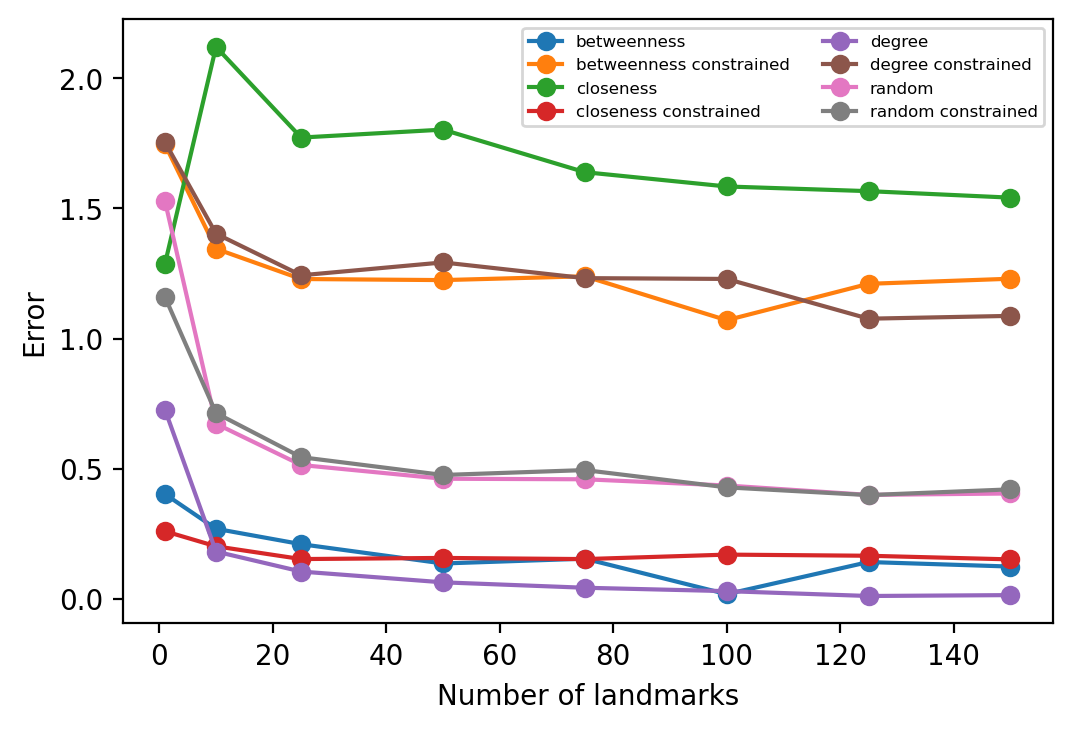

In [5]:

fig, ax = plt.subplots()
fig.set_dpi(200)
data.plot(xlabel='Number of landmarks', ylabel='Error', ax=ax, marker='o')
ax.legend(loc = 'upper right', ncol =2, prop={'size': 6})
plt.savefig("landmarks_accuracy.png")

In [6]:
print(summary.loc[summary['Dataset']=='github'])

    Dataset                 strategy  n_landmarks  mean error         Dir  \
50   github                   random            1    1.326951  Undirected   
51   github                   degree            1    0.184941  Undirected   
52   github              betweenness            1    0.184941  Undirected   
53   github                closeness            1    1.337325  Undirected   
54   github       random constrained            1    0.815842  Undirected   
..      ...                      ...          ...         ...         ...   
165  github                closeness          150    1.834547  Undirected   
166  github       random constrained          150    0.486033  Undirected   
167  github       degree constrained          150    0.925792  Undirected   
168  github  betweenness constrained          150    0.916409  Undirected   
169  github    closeness constrained          150    0.192114  Undirected   

     nodes  
50   37700  
51   37700  
52   37700  
53   37700  
54   37700

strategy     betweenness  betweenness constrained  closeness  \
n_landmarks                                                    
1               0.184941                 1.388889   1.337325   
10              0.040633                 1.047839   2.998697   
25              0.036265                 0.872832   2.298056   
50              0.021204                 0.979622   2.359983   
75              0.011909                 0.890459   2.031948   
100             0.009896                 0.888926   1.916701   
125             0.013610                 0.908667   1.890574   
150             0.007371                 0.916409   1.834547   

strategy     closeness constrained    degree  degree constrained    random  \
n_landmarks                                                                  
1                         0.236174  0.184941            1.388889  1.326951   
10                        0.253367  0.037988            1.047839  0.606237   
25                        0.160841  0.028886   

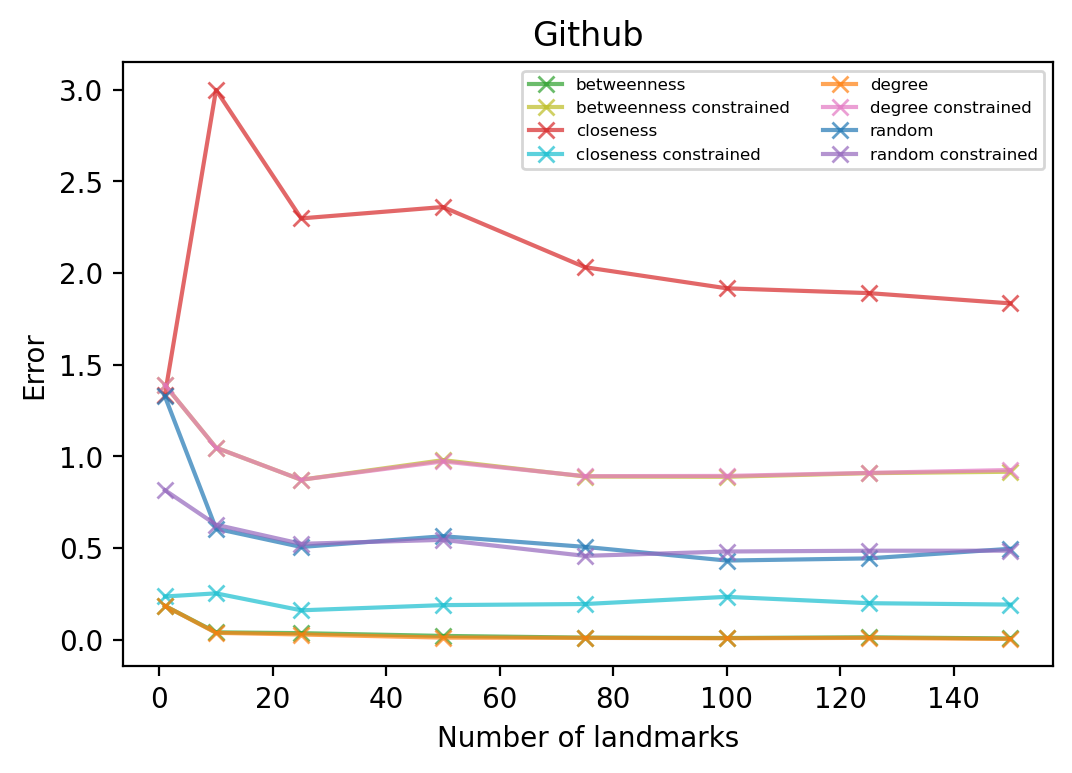

In [7]:
data1 = pd.pivot_table(summary.loc[summary['Dataset']=='github'], index='n_landmarks', columns=['strategy'], values='mean error')
data2 = pd.pivot_table(summary.loc[summary['Dataset']=='email'], index='n_landmarks', columns=['strategy'], values='mean error')
data3 = pd.pivot_table(summary.loc[summary['Dataset']=='road'], index='n_landmarks', columns=['strategy'], values='mean error')
data4 = pd.pivot_table(summary.loc[summary['Dataset']=='twitch'], index='n_landmarks', columns=['strategy'], values='mean error')
data5 = pd.pivot_table(summary.loc[summary['Dataset']=='web'], index='n_landmarks', columns=['strategy'], values='mean error')
print(data1)

#cmap = plt.get_cmap('tab20')
colours = {'random': 'tab:blue',\
          'degree': 'tab:orange',\
          'betweenness': 'tab:green',\
          'closeness': 'tab:red',\
          'random constrained': 'tab:purple',\
          'degree constrained': 'tab:pink',\
          'betweenness constrained': 'tab:olive',\
          'closeness constrained': 'tab:cyan'}
#cols = ['random', 'degree', 'betweenness', 'closeness', 'random constrained', 'degree constrained', 'betweenness constrained', 'closeness constrained']
#colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink', 'tab:olive', 'tab:cyan']

fig, ax = plt.subplots()
fig.set_dpi(200)
data1.plot(xlabel='Number of landmarks', ylabel='Error', ax=ax, color=colours, marker="x", alpha=0.7, legend=None)
ax.set_title("Github")
ax.legend(loc = 'upper right', ncol =2, prop={'size': 6})
plt.savefig("github_accuracy.png")

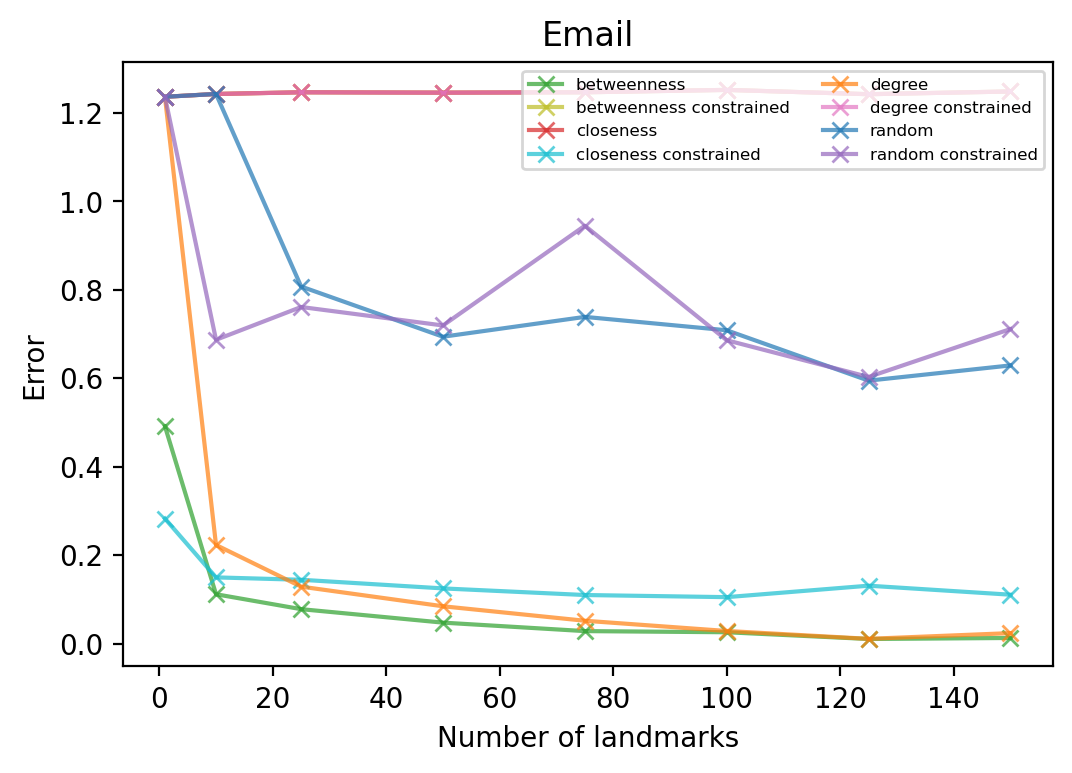

In [8]:
fig, ax = plt.subplots()
fig.set_dpi(200)
data2.plot(xlabel='Number of landmarks', ylabel='Error', ax=ax, color=colours, marker="x", alpha=0.7, legend=None)
ax.set_title("Email")
ax.legend(loc = 'upper right', ncol =2, prop={'size': 6})

plt.savefig("email_accuracy.png")

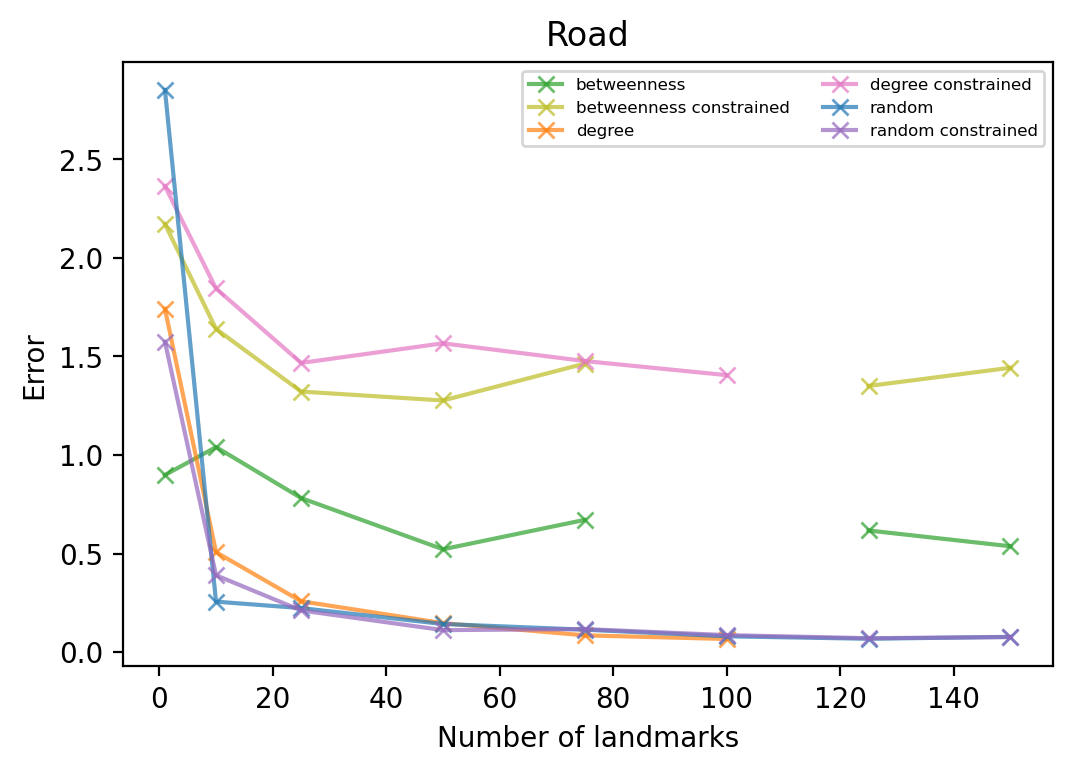

In [9]:
fig, ax = plt.subplots()
fig.set_dpi(200)
data3.plot(xlabel='Number of landmarks', ylabel='Error', ax=ax, color=colours, marker="x", alpha=0.7, legend=None)
ax.set_title("Road")
ax.legend(loc = 'upper right', ncol =2, prop={'size': 6})

plt.savefig("road_accuracy.png")

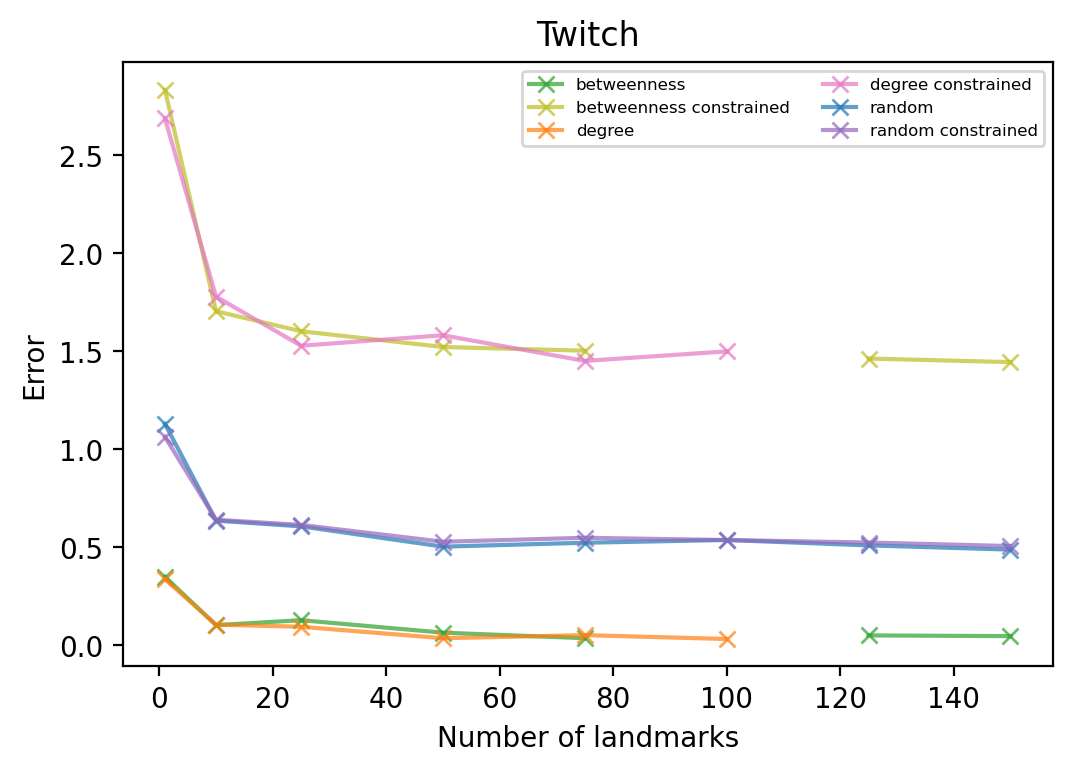

In [10]:
fig, ax = plt.subplots()
fig.set_dpi(200)
data4.plot(xlabel='Number of landmarks', ylabel='Error', ax=ax, color=colours, marker="x", alpha=0.7, legend=None)
ax.set_title("Twitch")
ax.legend(loc = 'upper right', ncol =2, prop={'size': 6})

plt.savefig("twitch_accuracy.png")

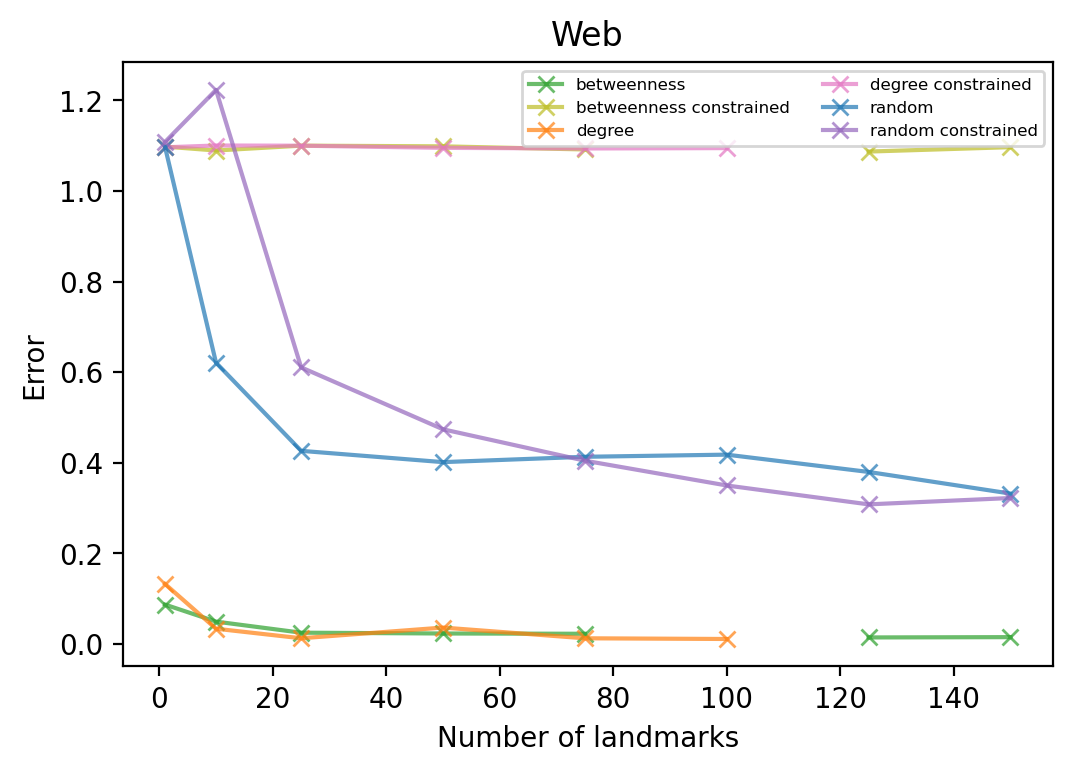

In [11]:
fig, ax = plt.subplots()
fig.set_dpi(200)
data5.plot(xlabel='Number of landmarks', ylabel='Error', ax=ax, color=colours, marker="x", alpha=0.7, legend=None)
ax.set_title("Web")
ax.legend(loc = 'upper right', ncol =2, prop={'size': 6})

plt.savefig("web_accuracy.png")

In [12]:
data_a = summary.loc[summary["n_landmarks"]==75]
data_a = pd.pivot_table(data_a, index='Dataset', columns=['strategy'], values='mean error')
data_a.to_csv("output1.tsv", sep="\t", index=True)
#data1 = pd.pivot_table(summary.loc[summary['Dataset']=='github'], index='n_landmarks', columns=['strategy'], values='mean error')
data_a

strategy,betweenness,betweenness constrained,closeness,closeness constrained,degree,degree constrained,random,random constrained
Dataset,,,,,,,,
email,0.028185,1.246506,1.246506,0.109777,0.051593,1.246506,0.738671,0.944789
github,0.011909,0.890459,2.031948,0.195130,0.010506,0.892368,0.506798,0.457641
road,0.670888,1.463780,NaN,NaN,0.084968,1.476531,0.113637,0.116599
twitch,0.036144,1.503116,NaN,NaN,0.051874,1.451000,0.523277,0.548685
web,0.022678,1.091826,NaN,NaN,0.012681,1.094005,0.413374,0.404778
